In [32]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_excel('animal.xlsx', sheet_name='Sheet2')

data.head()

,Animal Number,Date,Day Production,Intake Total,Weight,Prehension bites,eating chews,mastication chews,Rumination chews
0,NaN,NaT,(kg/day),kg,kg,bites,chews,chews,chews
1,1346.0,2020-09-24,38.6,9.41,552,15647,28501,12854,26595
2,1346.0,2020-09-25,41,8.65,551,20550,35707,15157,26776
3,1346.0,2020-09-26,40.2,8.49,554,23598,36607,13009,29871
4,1346.0,2020-09-27,40.4,8.55,563,24617,37709,13092,28605


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Animal Number      240 non-null    float64       
 1   Date               240 non-null    datetime64[ns]
 2   Day Production     239 non-null    object        
 3   Intake Total       241 non-null    object        
 4   Weight             223 non-null    object        
 5   Prehension bites   241 non-null    object        
 6   eating chews       241 non-null    object        
 7   mastication chews  241 non-null    object        
 8   Rumination chews   241 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 17.1+ KB


In [34]:
data.drop(0, inplace=True)

In [35]:
data.isna().sum()

Animal Number         0
Date                  0
Day Production        2
Intake Total          0
Weight               18
Prehension bites      0
eating chews          0
mastication chews     0
Rumination chews      0
dtype: int64

In [36]:
for column in data.columns[[2,4]]:
    data[column].fillna(value=data.groupby('Animal Number')[column].transform('mean'), inplace=True)

In [37]:
data.isna().sum()

Animal Number        0
Date                 0
Day Production       0
Intake Total         0
Weight               0
Prehension bites     0
eating chews         0
mastication chews    0
Rumination chews     0
dtype: int64

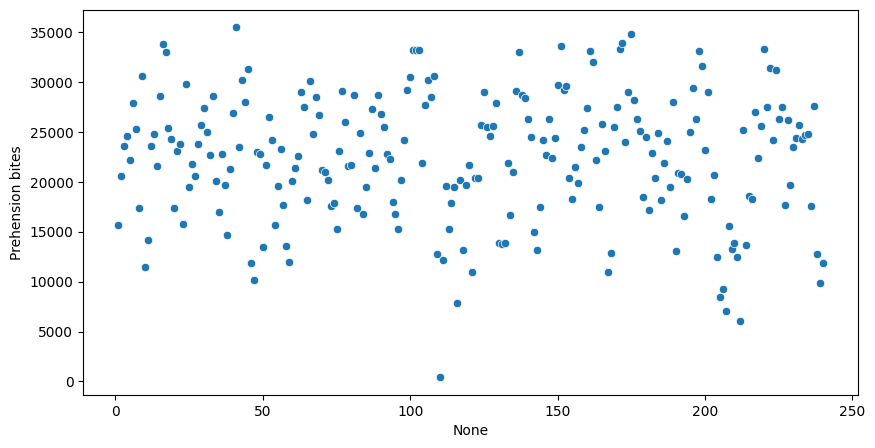

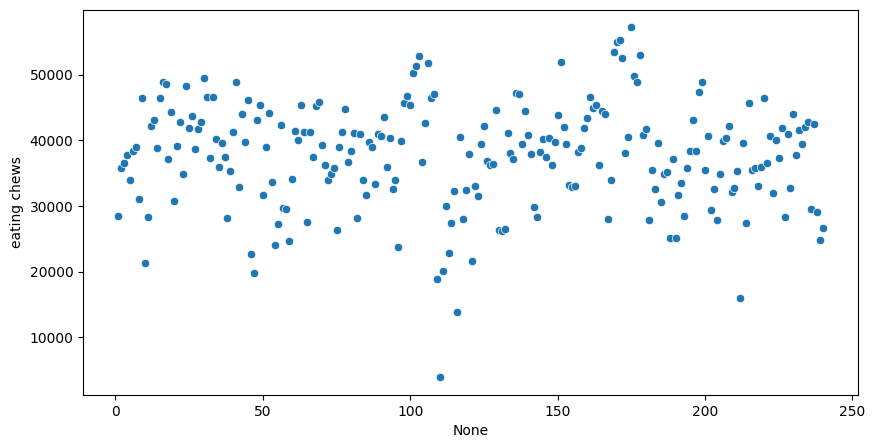

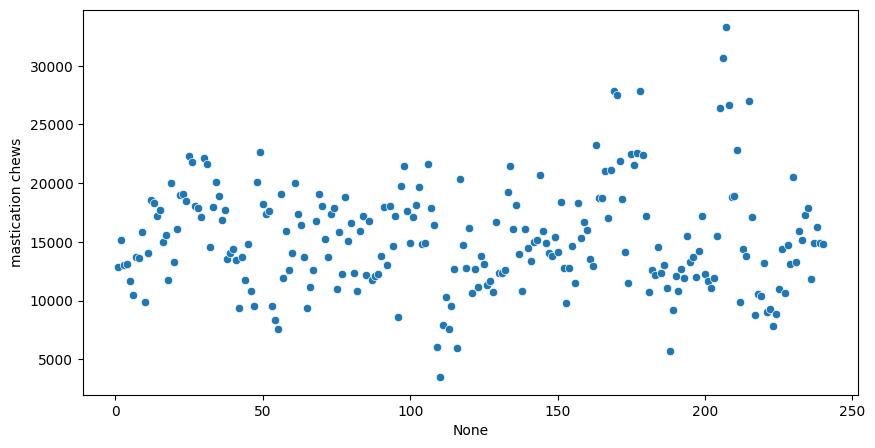

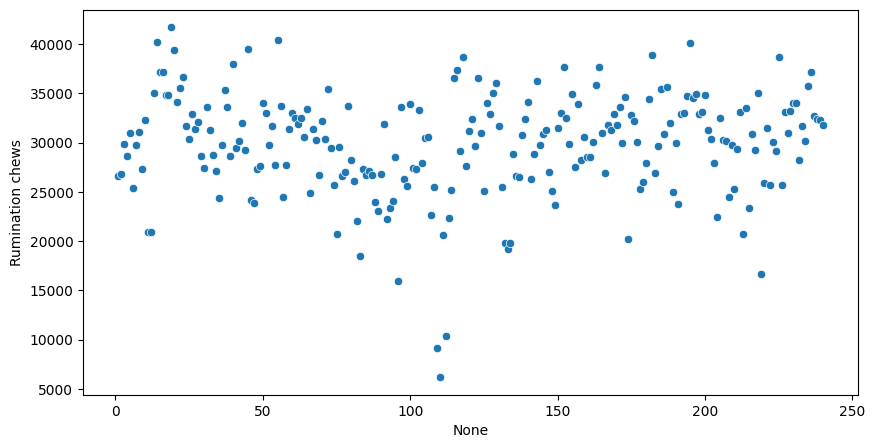

In [38]:

y_range_before_cleaning = {}

for column in data.columns[5:]:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=data, x=data.index, y=column)
    
    y_range_before_cleaning[column] = (data[column].min(), data[column].max()) 


    plt.ylabel(column)
    plt.show()    

In [39]:

for column in data.columns[5:]:
    selected_column = data[column]

    std = selected_column.std()
    avg = selected_column.mean()

    upper_bound = avg + (2 * std)
    lower_bound = avg - (2 * std)

    outliers_mask = (data[column] >= upper_bound) | (data[column] <= lower_bound)
    outliers_index = data[outliers_mask].index

    data.drop(index=outliers_index, inplace=True)


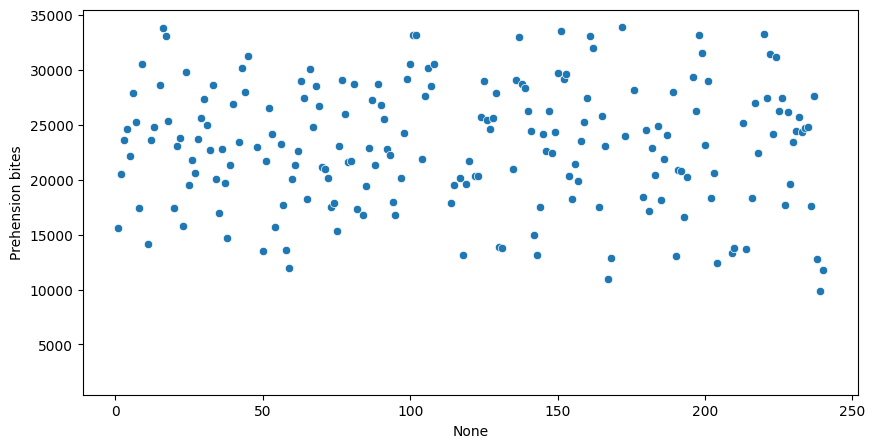

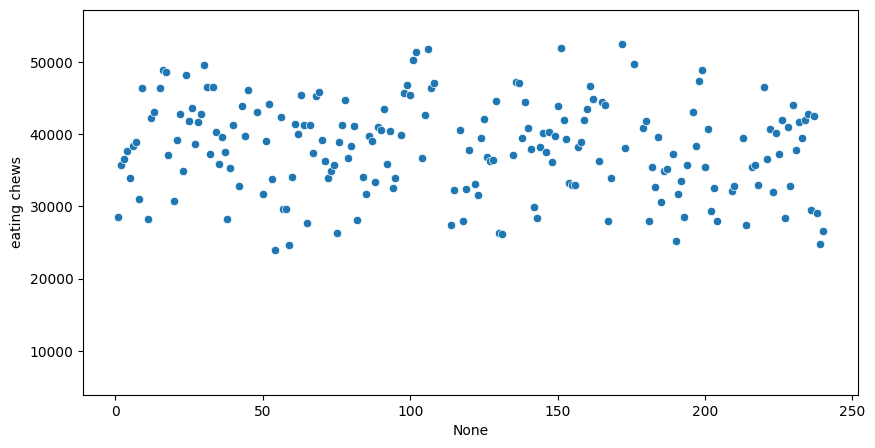

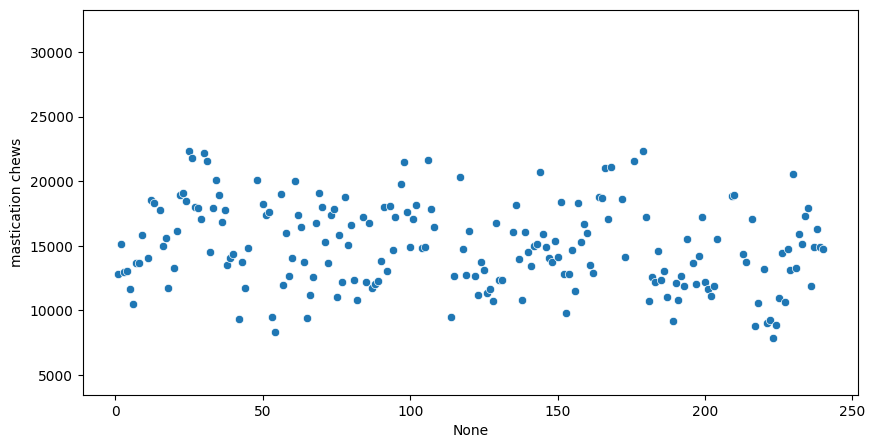

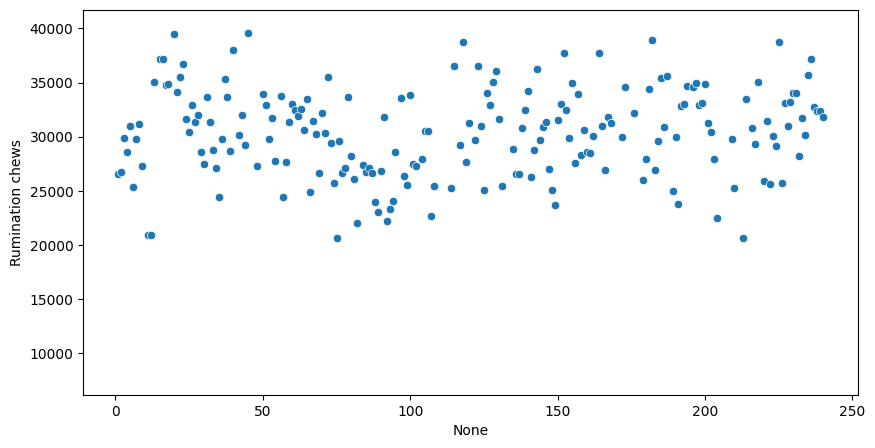

In [40]:
for column in data.columns[5:]:
    plt.figure(figsize=(10, 5))
    

    sns.scatterplot(data=data, x=data.index, y=column)
    
    plt.ylim(y_range_before_cleaning[column])

    plt.ylabel(column)
    plt.show()    

In [41]:

#An IQR (Interquartile Range) based filtering process
for column in data.columns[5:]:
    selected_column = data[column]


    q1 = selected_column.quantile(0.25)
    q3 = selected_column.quantile(0.75)

    iqr = q3 - q1

    minimum = q1 - (1 * iqr)
    maximum = q3 + (1 * iqr)


    max_idxs = data[(data[column] > maximum)].index
    min_idxs = data[(data[column] < minimum)].index

    print(selected_column.name, " | ", max_idxs, " | ",min_idxs)


    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

    




Prehension bites  |  Int64Index([], dtype='int64')  |  Int64Index([167, 239, 240], dtype='int64')
eating chews  |  Int64Index([102, 106, 151, 172], dtype='int64')  |  Int64Index([54, 59], dtype='int64')
mastication chews  |  Int64Index([25, 179], dtype='int64')  |  Int64Index([], dtype='int64')
Rumination chews  |  Int64Index([], dtype='int64')  |  Int64Index([75, 213], dtype='int64')


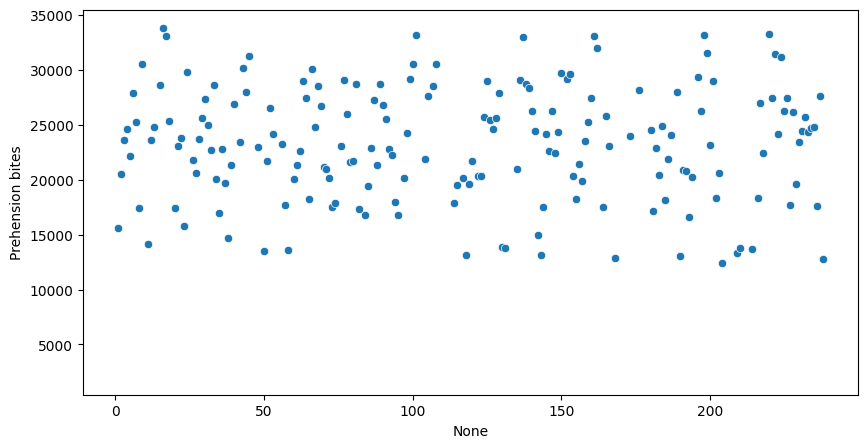

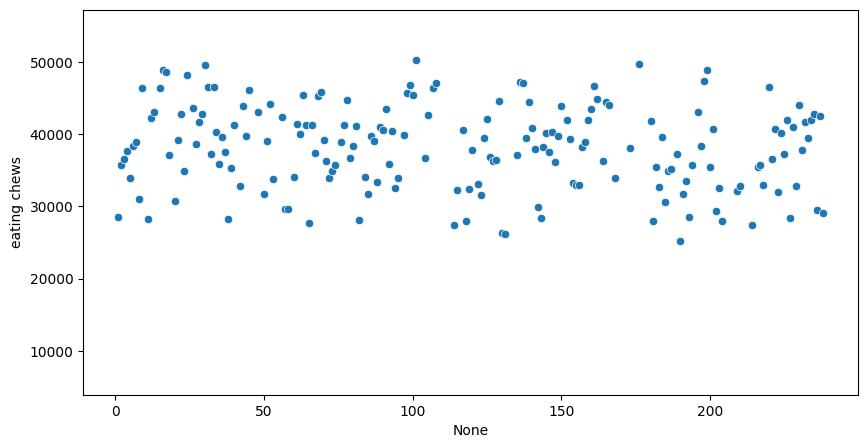

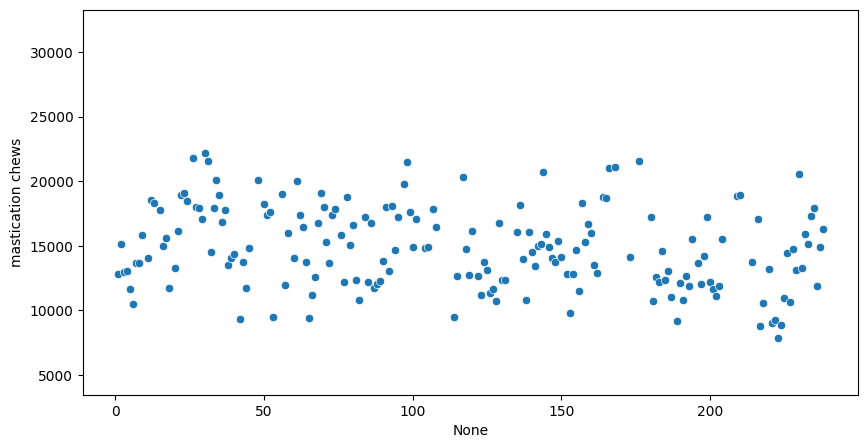

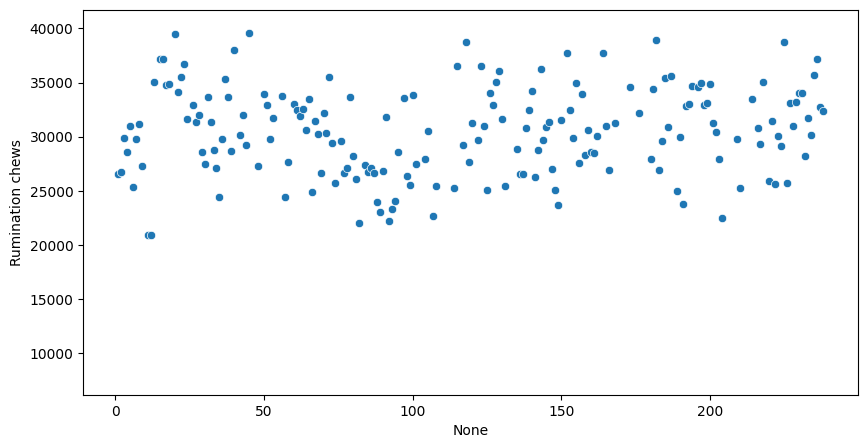

In [42]:
for column in data.columns[5:]:
    plt.figure(figsize=(10, 5))
   
    sns.scatterplot(data=data, x=data.index, y=column)
    
    plt.ylim(y_range_before_cleaning[column])

    plt.ylabel(column)
    plt.show()    

In [43]:
data.drop(["Animal Number", "Date", "Intake Total", "Weight"], axis=1, inplace=True)
data.head()

,Day Production,Prehension bites,eating chews,mastication chews,Rumination chews
1,38.6,15647,28501,12854,26595
2,41.0,20550,35707,15157,26776
3,40.2,23598,36607,13009,29871
4,40.4,24617,37709,13092,28605
5,40.3,22200,33882,11682,31022


In [44]:
column_mapping = {
    'Prehension bites': 'Prehension Bites',
    'eating chews': 'Eating Chews',
    'mastication chews': 'Mastication Chews',
    'Rumination chews': 'Rumination Chews',
}

data.rename(columns=column_mapping, inplace=True)



In [45]:
data.to_excel("final_data.xlsx", index=False)   


In [46]:
import pandas as pd 
excel_file_path = 'final_data.xlsx'
data = pd.read_excel(excel_file_path)

data.head()

,Day Production,Prehension Bites,Eating Chews,Mastication Chews,Rumination Chews
0,38.6,15647,28501,12854,26595
1,41.0,20550,35707,15157,26776
2,40.2,23598,36607,13009,29871
3,40.4,24617,37709,13092,28605
4,40.3,22200,33882,11682,31022


In [47]:
input_column = 'Mastication Chews'

data['Calculated Chewing'] = data['Mastication Chews'] / (24 * 60 * 60 / 20)

chewing_result_data = data[['Calculated Chewing']]

average_calculated_chewing = data['Calculated Chewing'].mean()

print(chewing_result_data.head())
print(average_calculated_chewing)



   Calculated Chewing
0            2.975463
1            3.508565
2            3.011343
3            3.030556
4            2.704167
3.4391031323877073


In [48]:
input_column = 'Day Production'

data['Calculated Day Production'] = data['Day Production'] / (24 * 60 * 60 / 20)

production_result_data = data[['Calculated Day Production']]

average_calculated_day_production = data['Calculated Day Production'].mean()

print(production_result_data.head())
print(average_calculated_day_production)


   Calculated Day Production
0                   0.008935
1                   0.009491
2                   0.009306
3                   0.009352
4                   0.009329
0.007439174546887312


In [49]:
# Concatenate the two Series into a DataFrame
combined_data = pd.concat([chewing_result_data, production_result_data], axis=1)
combined_data.columns = ['Chews', 'Day Production']

# Write to Excel
combined_data.to_excel('iot_data.xlsx', index=False)

In [50]:
daily_milk_product = 25

milk_product_per_twenty_second = daily_milk_product / (24 * 60 * 60 / 20)

print(milk_product_per_twenty_second)


0.005787037037037037


In [51]:
data = pd.read_excel('iot_data.xlsx')

In [52]:
#healthy = 0 / unhealthy = 1

data['Health'] = (data['Day Production'] < milk_product_per_twenty_second).astype(int)

data.drop(data.columns[1], axis=1, inplace=True)
data.head(n=5)

,Chews,Health
0,2.975463,0
1,3.508565,0
2,3.011343,0
3,3.030556,0
4,2.704167,0


In [53]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=1)

In [54]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Define models
models = [
   SVC(),
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    ExtraTreesClassifier()
]

accuracies = []
model_names = []

# Train models and evaluate accuracy
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    model_names.append(model.__class__.__name__)
    print(f'{model.__class__.__name__} Accuracy: {accuracy}')

SVC Accuracy: 0.631578947368421
RandomForestClassifier Accuracy: 0.6842105263157895
LogisticRegression Accuracy: 0.6578947368421053
KNeighborsClassifier Accuracy: 0.5789473684210527
GaussianNB Accuracy: 0.6578947368421053
DecisionTreeClassifier Accuracy: 0.6842105263157895
XGBClassifier Accuracy: 0.6052631578947368
GradientBoostingClassifier Accuracy: 0.6842105263157895
LinearDiscriminantAnalysis Accuracy: 0.6578947368421053
ExtraTreesClassifier Accuracy: 0.6578947368421053


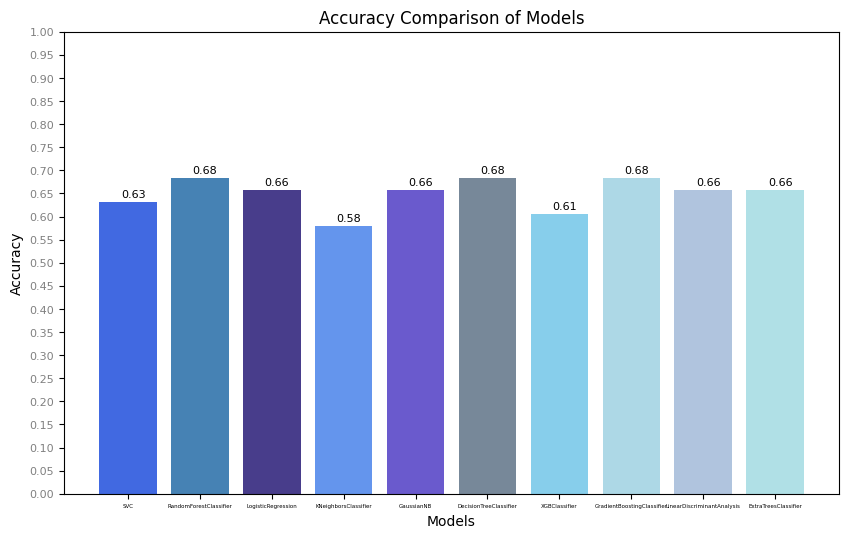

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


plt.figure(figsize=(10, 6))

# Names of models
model_names = [model.__class__.__name__ for model in models]

# Bar colors
colors = ['slateblue', 'lightsteelblue', 'lightslategray', 'lightblue', 'powderblue', 'cornflowerblue', 'royalblue', 'skyblue', 'darkslateblue', 'steelblue', 'ghostwhite']
def color_to_rgb(color):
    return mcolors.to_rgba(color)[:3]
sorted_colors = sorted(colors, key=color_to_rgb)

# Bar drawing
bars = plt.bar(model_names, accuracies, color=sorted_colors)

# Style of text on x and y axis
plt.xticks(rotation=0, ha='center', va='top', fontsize=4) 
plt.yticks(np.arange(0, 1.05, 0.05), fontsize=8, color="gray") # Values starting from 0 and increasing by 0.05 each time

plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.ylim(0, 1)  # Limits are set due to the y axis is in the range 0-1

# Print values on bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy:.2f}', fontsize=8)

plt.show()

In [58]:
import joblib


model = GaussianNB()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Modeli kaydetme
joblib.dump(model, 'haysay_health_model.pkl')

Model Accuracy: 0.6578947368421053


['haysay_health_model.pkl']

In [ ]:
# from pycaret.classification import *


In [ ]:
# clf = setup(data=data, target='Health', )


In [ ]:
# best_model = compare_models(sort='Accuracy', n_select=1)

In [ ]:
# model = create_model("nb")  

# evaluate_model(model)


In [ ]:
# import numpy as np
# import pandas as pd

# np.random.seed(42)

# # Achieving repeatable randomness by determining the seed value
# num_rows = 20
# average_chewing = average_calculated_chewing
# std = 0.5  # Standart sapma değeri isteğe bağlı olarak ayarlanabilir

# # Random sampling from normal distribution with mean and standard deviation
# chewing_values = np.round(np.random.normal(loc=average_chewing, scale=std, size=num_rows)).astype(int)

# additional_values = np.random.randint(-2, 4, size=num_rows)
# chewing_values += additional_values


# # Create DataFrame
# data = pd.DataFrame({'Chews': chewing_values})

# data.to_excel("dummy_data.xlsx", index=False)

# data.head(n=10)


In [ ]:
# dummy_data = pd.read_excel("dummy_data.xlsx")

# predictions = predict_model(model, data=dummy_data)

# print(predictions)

# plot_model(model, plot='confusion_matrix')




In [ ]:
# # Save the model
# save_model(model, 'haysay_haelth_model')